In [94]:
# import the required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import PercentFormatter
from sklearn.model_selection import train_test_split
from sklearn import tree
from sklearn.metrics import confusion_matrix, precision_recall_fscore_support, accuracy_score, f1_score
from sklearn.metrics import accuracy_score, f1_score

For each dataset:
1. Load the dataset in Python.

In [95]:
# Create dataframes from the dataset csv files. Change the path if required
penguins_df = pd.read_csv('Datasets/penguins.csv', delimiter=',')
abalone_df = pd.read_csv('Datasets/abalone.csv', delimiter=',')

(a) for the Penguin dataset, the features island and sex are strings, therefore they need to be converted to numerical format to be fed to the MLP. To do so, experiment with 2 methods:
  - i. convert these features into 1-hot vectors (also known as dummy-coded data)
  - ii. convert these features into categories yourself

In [96]:
# first experiment: i. convert the features into 1-hot vectors

# encode the features
dummy_coded_island = pd.get_dummies(penguins_df['island'], dtype=float)
dummy_coded_sex = pd.get_dummies(penguins_df['sex'], dtype=float)
dummy_coded_species = pd.get_dummies(penguins_df['species'], dtype=float) # also encoding the target

# Concatenate dummy coded data with penguins_df and drop original columns
one_hot_penguins_df = pd.concat([penguins_df, dummy_coded_island, dummy_coded_sex, dummy_coded_species], axis='columns')
one_hot_penguins_df = one_hot_penguins_df.drop(['island', 'sex', 'species'], axis='columns')

one_hot_penguins_df.head(5)

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,Biscoe,Dream,Torgersen,FEMALE,MALE,Adelie,Chinstrap,Gentoo
0,39.1,18.7,181,3750,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0
1,39.5,17.4,186,3800,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0
2,40.3,18.0,195,3250,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0
3,36.7,19.3,193,3450,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0
4,39.3,20.6,190,3650,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0


In [97]:
# second experiment: convert the features into categories yourself
# copy df and convert the features by replacing string values with numerical values
encoded_penguins_df = penguins_df.copy()
encoded_penguins_df['island'].replace(['Biscoe', 'Dream', 'Torgersen'], [0, 1, 2], inplace=True)
encoded_penguins_df['sex'].replace(['FEMALE', 'MALE'], [0, 1], inplace=True)
encoded_penguins_df['species'].replace(['Adelie', 'Chinstrap', 'Gentoo'], [0, 1, 2], inplace=True)  # also encoding the target

encoded_penguins_df.head(5)

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,0,2,39.1,18.7,181,3750,1
1,0,2,39.5,17.4,186,3800,0
2,0,2,40.3,18.0,195,3250,0
3,0,2,36.7,19.3,193,3450,0
4,0,2,39.3,20.6,190,3650,1


(b) determine if the Abalone dataset can be used as is; otherwise convert any features using the 2 methods above.

In [98]:
# first experiment: i. convert the target into 1-hot vector

# encode the target
dummy_coded_type = pd.get_dummies(abalone_df['Type'], dtype=float) # encoding the target

# Concatenate dummy coded data with abalone_df and drop original column
one_hot_abalone_df = pd.concat([abalone_df, dummy_coded_type], axis='columns')
one_hot_abalone_df = one_hot_abalone_df.drop(['Type'], axis='columns')

one_hot_abalone_df.head(5)

,LongestShell,Diameter,Height,WholeWeight,ShuckedWeight,VisceraWeight,ShellWeight,Rings,F,I,M
0,0.605,0.470,0.165,1.1775,0.6110,0.2275,0.2920,9,1.0,0.0,0.0
1,0.550,0.425,0.150,0.8315,0.4110,0.1765,0.2165,10,0.0,0.0,1.0
2,0.460,0.345,0.110,0.4595,0.2350,0.0885,0.1160,7,0.0,0.0,1.0
3,0.650,0.475,0.165,1.3875,0.5800,0.3485,0.3095,9,1.0,0.0,0.0
4,0.575,0.470,0.140,0.8375,0.3485,0.1735,0.2400,11,0.0,0.0,1.0


In [99]:
# second experiment: convert the features into categories yourself
# copy df and convert the target by replacing string values with numerical values
encoded_abalone_df = abalone_df.copy()
encoded_abalone_df['Type'].replace(['F', 'I', 'M'], [0, 1, 2], inplace=True)  # encoding the target

encoded_abalone_df.head(5)

,Type,LongestShell,Diameter,Height,WholeWeight,ShuckedWeight,VisceraWeight,ShellWeight,Rings
0,0,0.605,0.470,0.165,1.1775,0.6110,0.2275,0.2920,9
1,2,0.550,0.425,0.150,0.8315,0.4110,0.1765,0.2165,10
2,2,0.460,0.345,0.110,0.4595,0.2350,0.0885,0.1160,7
3,0,0.650,0.475,0.165,1.3875,0.5800,0.3485,0.3095,9
4,2,0.575,0.470,0.140,0.8375,0.3485,0.1735,0.2400,11


***Observation*** Converting using one-hot labeling is useful because you don't need to know the values of the columns ahead of time but it creates additional columns that aren't required and is not desired for the target class. Converting manually was simplified because the first experiment provided the values that we used for a manual conversion. We'll use the manually encoded dataframes for the following sections.

2. Plot the percentage of the instances in each output class and store the graphic in a file called penguin-classes.gif / abalone-classes.gif. This analysis of the dataset will allow you to determine if the classes are balanced. Which metric is more appropriate to use to evaluate the performance. Be ready to discuss this at the demo.

In [100]:
# function to plot percentage
def plot_class_percentage(df, col, title):
    '''
    Plots the percentage of a specified column of the given dataframe
    '''
    plt.hist(df[col], weights=np.ones(len(df)) / len(df), edgecolor='black')
    plt.gca().yaxis.set_major_formatter(PercentFormatter(1, decimals=0))
    plt.xlabel(col)
    plt.title(title)
    plt.show()

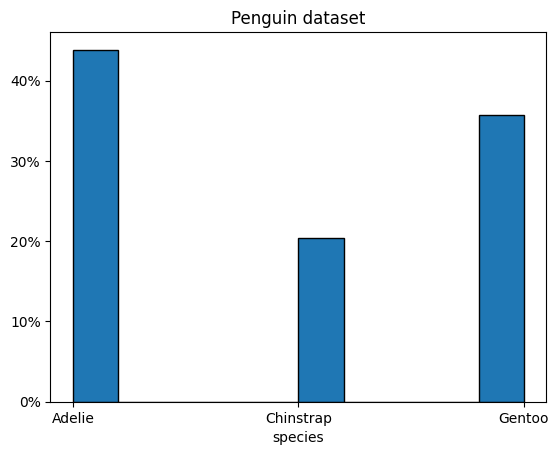

In [101]:
plot_class_percentage(penguins_df, 'species', 'Penguin dataset')

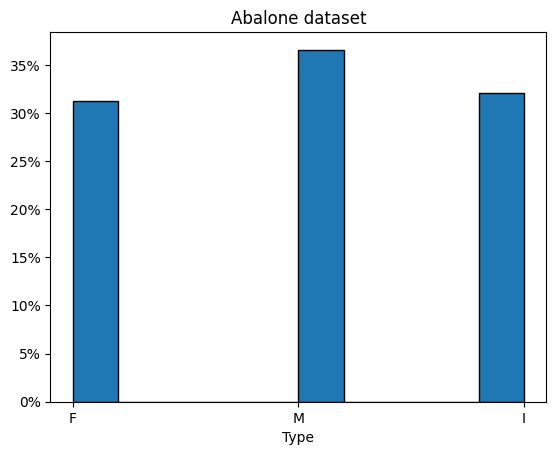

In [102]:
plot_class_percentage(abalone_df, 'Type', 'Abalone dataset')

3. Split the dataset using train test split using the default parameter values.

In [103]:
# function to split a dataframe using the default settings
def default_train_test_split(df, target):
    '''
    Takes a dataframe and a the target class name and returns the X_train, y_train, X_test, y_test splits
    The data has the default .75/.25 train/test split
    '''
    train, test = train_test_split(df) # split the data into a train and test set

    features = df.loc[:, ~df.columns.isin([target])].columns # get the feature column names

    # X_train contains only features and y_train contains the targets
    X_train = train[features]
    y_train = train[target]

    # X_test contains only features and y_test contains the targets
    X_test = test[features]
    y_test = test[target]

    return X_train, X_test, y_train, y_test

In [104]:
# split the train and test sets for the penguins and abalone datasets
X_train_pen, X_test_pen, y_train_pen, y_test_pen = default_train_test_split(encoded_penguins_df, 'species')
X_train_aba, X_test_aba, y_train_aba, y_test_aba = default_train_test_split(encoded_abalone_df, 'Type')

4. Train and test 4 different classifiers:

(a) Base-DT: a Decision Tree with the default parameters. Show the decision tree graphically (for the
abalone dataset, you can restrict the tree depth for visualisation purposes)

In [105]:
def baseDT(X, y, class_names, max_depth=None):
    '''
    Uses the default parameters of the Decision Tree.
    Default DecisionTreeClassifier parameters: 
         criterion='gini', splitter='best', max_depth=None, 
         min_samples_split=2, min_samples_leaf=1, min_weight_fraction_leaf=0.0, 
         max_features=None, random_state=None, max_leaf_nodes=None, 
         min_impurity_decrease=0.0, class_weight=None, ccp_alpha=0.0

    Then plots the tree and return the model.
    '''
    # train the DT
    model = tree.DecisionTreeClassifier()
    model.fit(X, y) 
    # plot the tree
    plt.figure(figsize=(20,20))
    _ = tree.plot_tree(model, feature_names=list(X.columns), class_names=class_names, filled=True, max_depth=max_depth)

    return model

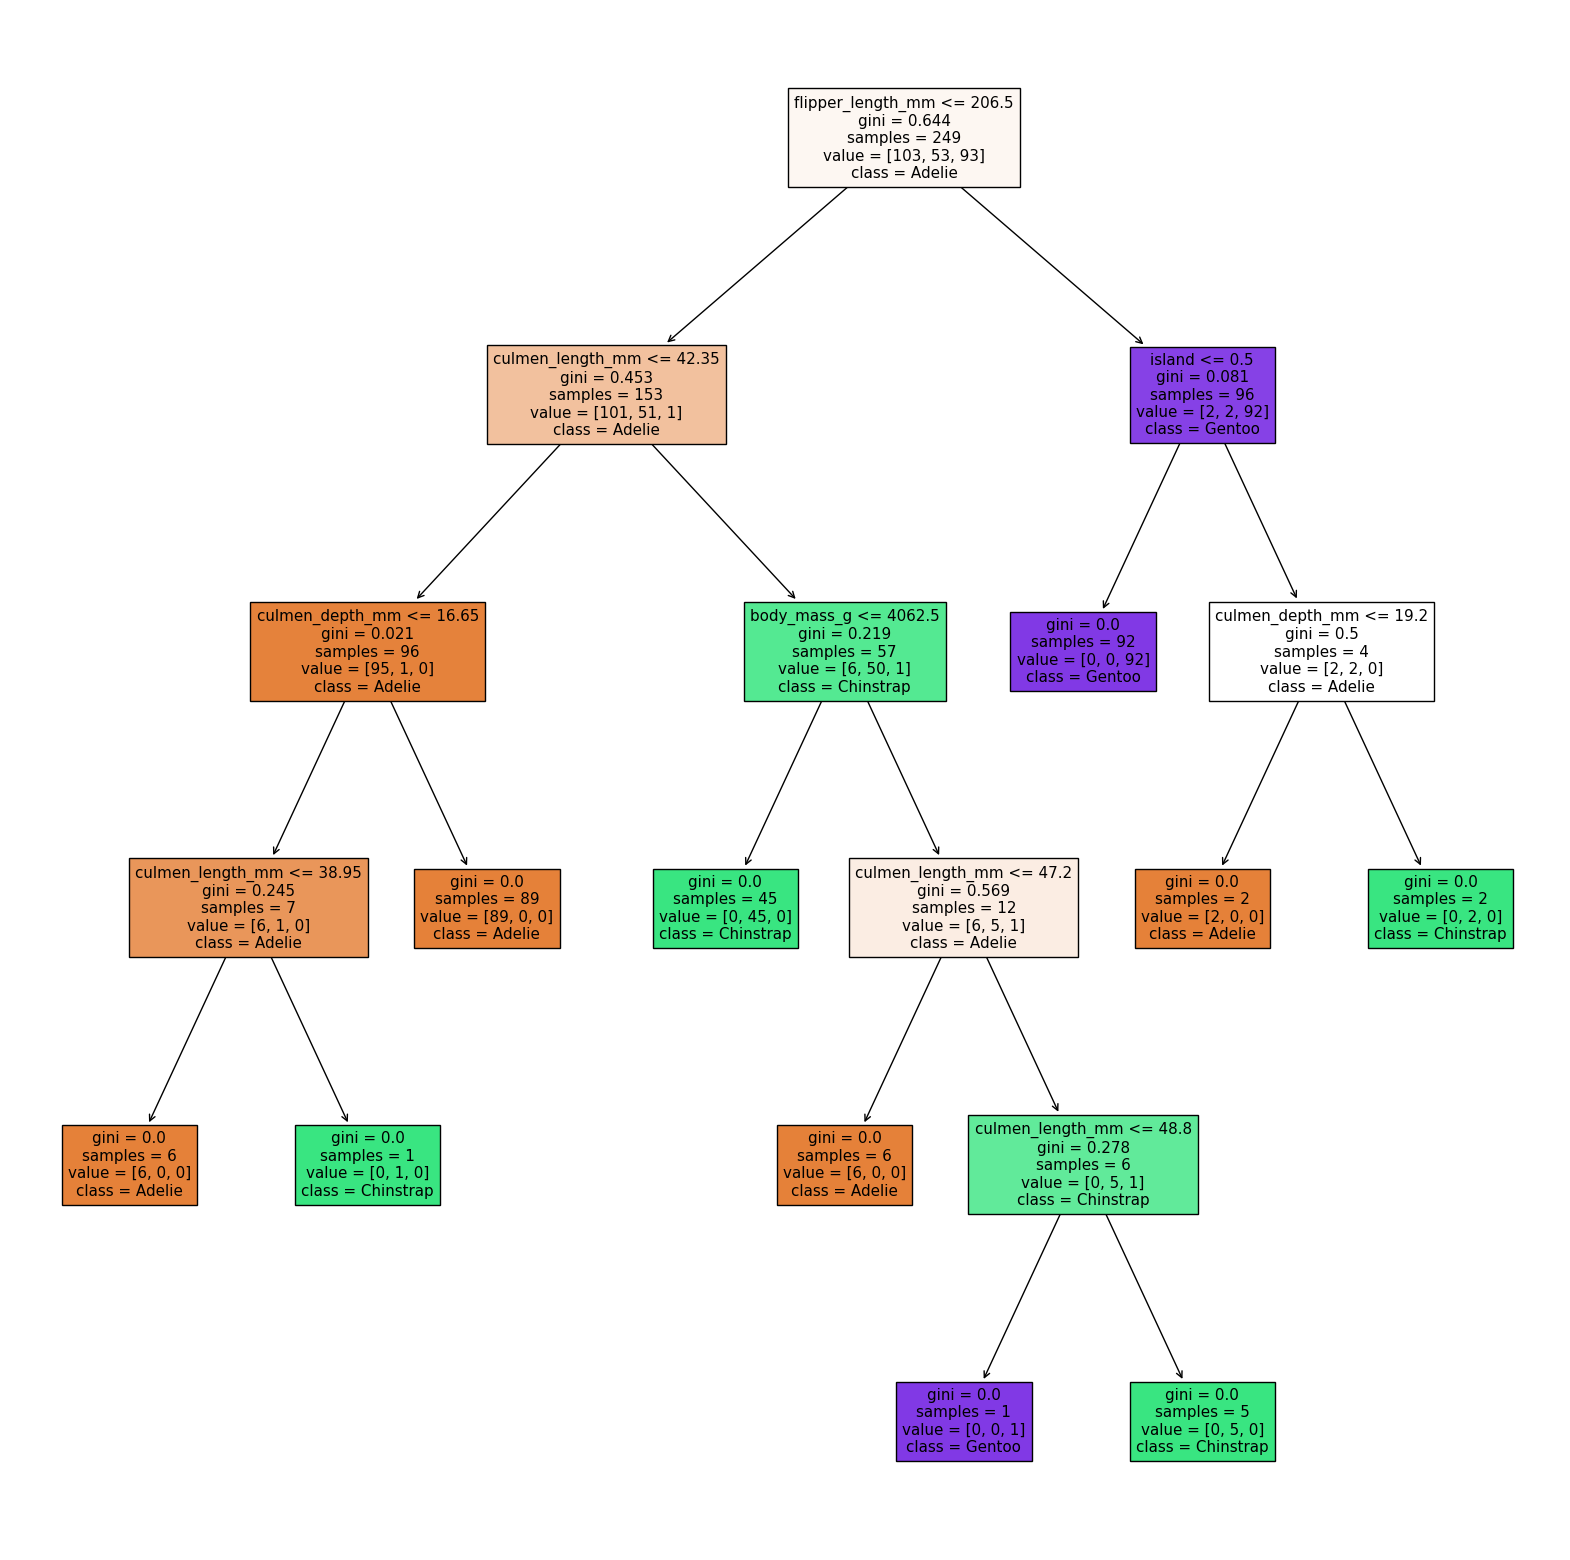

In [106]:
# base model for penguins dataset
model_base_dt1 = baseDT(X_train_pen, y_train_pen, ['Adelie', 'Chinstrap', 'Gentoo'])

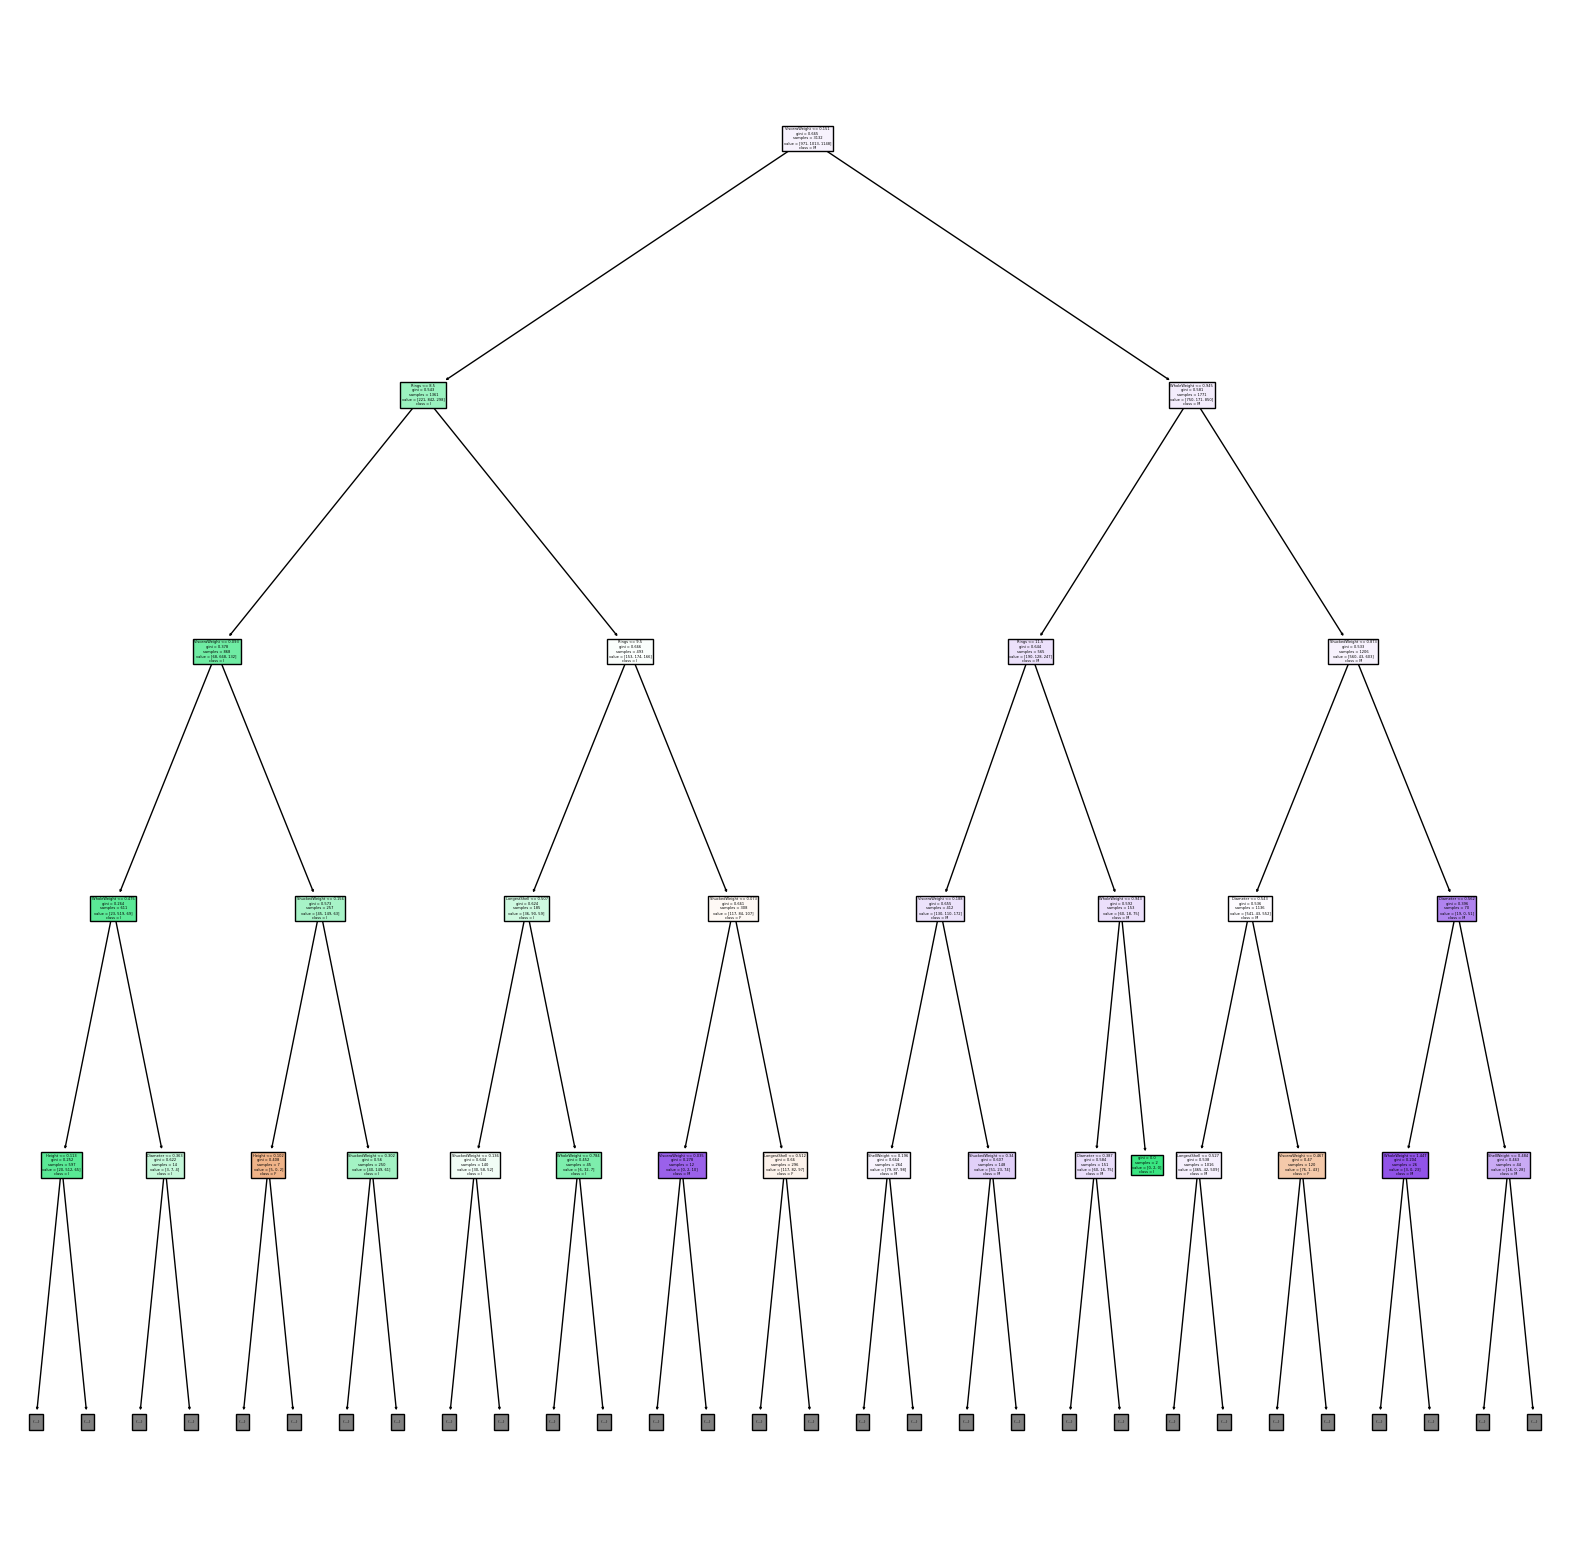

In [107]:
# base model for abalone dataset
model_base_dt2 = baseDT(X_train_aba, y_train_aba, ['F', 'I', 'M'], 4)

(b) Top-DT: a better performing Decision Tree found using a gridsearch. The gridsearch will allow you
to find the best combination of hyper-parameters, as determined by the evaluation function that you
have determined in step (3) above. The hyper-parameters that you will experiment with are:
- criterion: gini or entropy
- max depth : 2 different values of your choice and ”None”
- min samples split: 3 different values of your choice

Show the decision tree graphically (for the abalone dataset, you can restrict the tree depth for visualisation purposes)

(c) Base-MLP: a Multi-Layered Perceptron with 2 hidden layers of 100+100 neurons, sigmoid/logistic
as activation function, stochastic gradient descent, and default values for the rest of the parameters.

(d) Top-MLP: a better performing Multi-Layered Perceptron found using grid search. For this, you need
to experiment with the following hyper-parameter values:
- activation function: sigmoid, tanh and relu
- 2 network architectures of your choice: for eg 2 hidden layers with 30 + 50 nodes, 3 hidden layers with 10 + 10 + 10
- solver: adam and stochastic gradient descent

5. For each of the 4 classifiers above 4(a), 4(b), 4(c) and 4(d), append the following information in a file called
penguin-performance.txt / abalone-performance.txt: (to make it easier for the TAs, make sure that
your output for each sub-question below is clearly marked in your output file, using the headings (A), (B) ... )

- (A) a clear separator (a sequence of hyphens or stars) and a string clearly describing the model (e.g. the
model name + hyper-parameter values that you changed). In the case of Top-DT and Top-MLP,
display the best hyperparameters found by the gridsearch.
- (B) the confusion matrix
- (C) the precision, recall, and F1-measure for each class
- (D) the accuracy, macro-average F1 and weighted-average F1 of the model

In [108]:
def save_model_evaluation_results(model, X_train, y_train, X_test, y_test, output_filename,version):
    # Train the model
    model.fit(X_train, y_train)

    # (A) Save model information
    model_info = f"Model: {str(model)}\n"
    model_info += '-' * 50 + '\n'

    # (B) Calculate and save the confusion matrix
    y_pred = model.predict(X_test)
    cm = confusion_matrix(y_test, y_pred)
    cm_df = pd.DataFrame(cm, index=[f'Actual {i}' for i in range(len(cm))], columns=[f'Predicted {i}' for i in range(len(cm))])
    cm_info = "Confusion Matrix:\n"
    cm_info += str(cm_df) + '\n'

    # (C) Calculate and save precision, recall, and F1-measure for each class
    precision, recall, f1, support = precision_recall_fscore_support(y_test, y_pred)
    prf_info = "Precision, Recall, and F1-Measure for Each Class:\n"
    prf_info += pd.DataFrame({'Precision': precision, 'Recall': recall, 'F1-Score': f1, 'Support': support}).to_string() + '\n'

    # (D) Calculate and save accuracy, macro-average F1, and weighted-average F1
    accuracy = accuracy_score(y_test, y_pred)
    macro_f1 = f1_score(y_test, y_pred, average='macro')
    weighted_f1 = f1_score(y_test, y_pred, average='weighted')
    evaluation_info = f"Accuracy: {accuracy:.4f}\n"
    evaluation_info += f"Macro-average F1: {macro_f1:.4f}\n"
    evaluation_info += f"Weighted-average F1: {weighted_f1:.4f}\n"

    # Save all information to a text file
    with open(output_filename, 'a') as file:
        
        file.write("(A) "+model_info)
        file.write("(B) "+cm_info)
        file.write("(C) "+prf_info)
        file.write("(D) "+evaluation_info)
        file.write('-' * 50 + '\n')

    print(f"Results saved to {output_filename}")
save_model_evaluation_results(model_base_dt1,X_train_pen,y_train_pen,X_test_pen,y_test_pen,"penguin-performance","(A)")
save_model_evaluation_results(model_base_dt2,X_train_aba,y_train_aba,X_test_aba,y_test_aba,"abalone-performance","(A)")

Results saved to penguin-performance
Results saved to abalone-performance


6. Redo steps 4 & 5, 5 times for each model and append in the performance files:
 - (A) the average accuracy & the variance,
 - (B) average macro-average F1 & the variance,
 - (C) average weighted-average F1 & the variance.
 
Does the same model give you the same performance every time? is the standard deviation high? Be ready
to discuss this at the demo

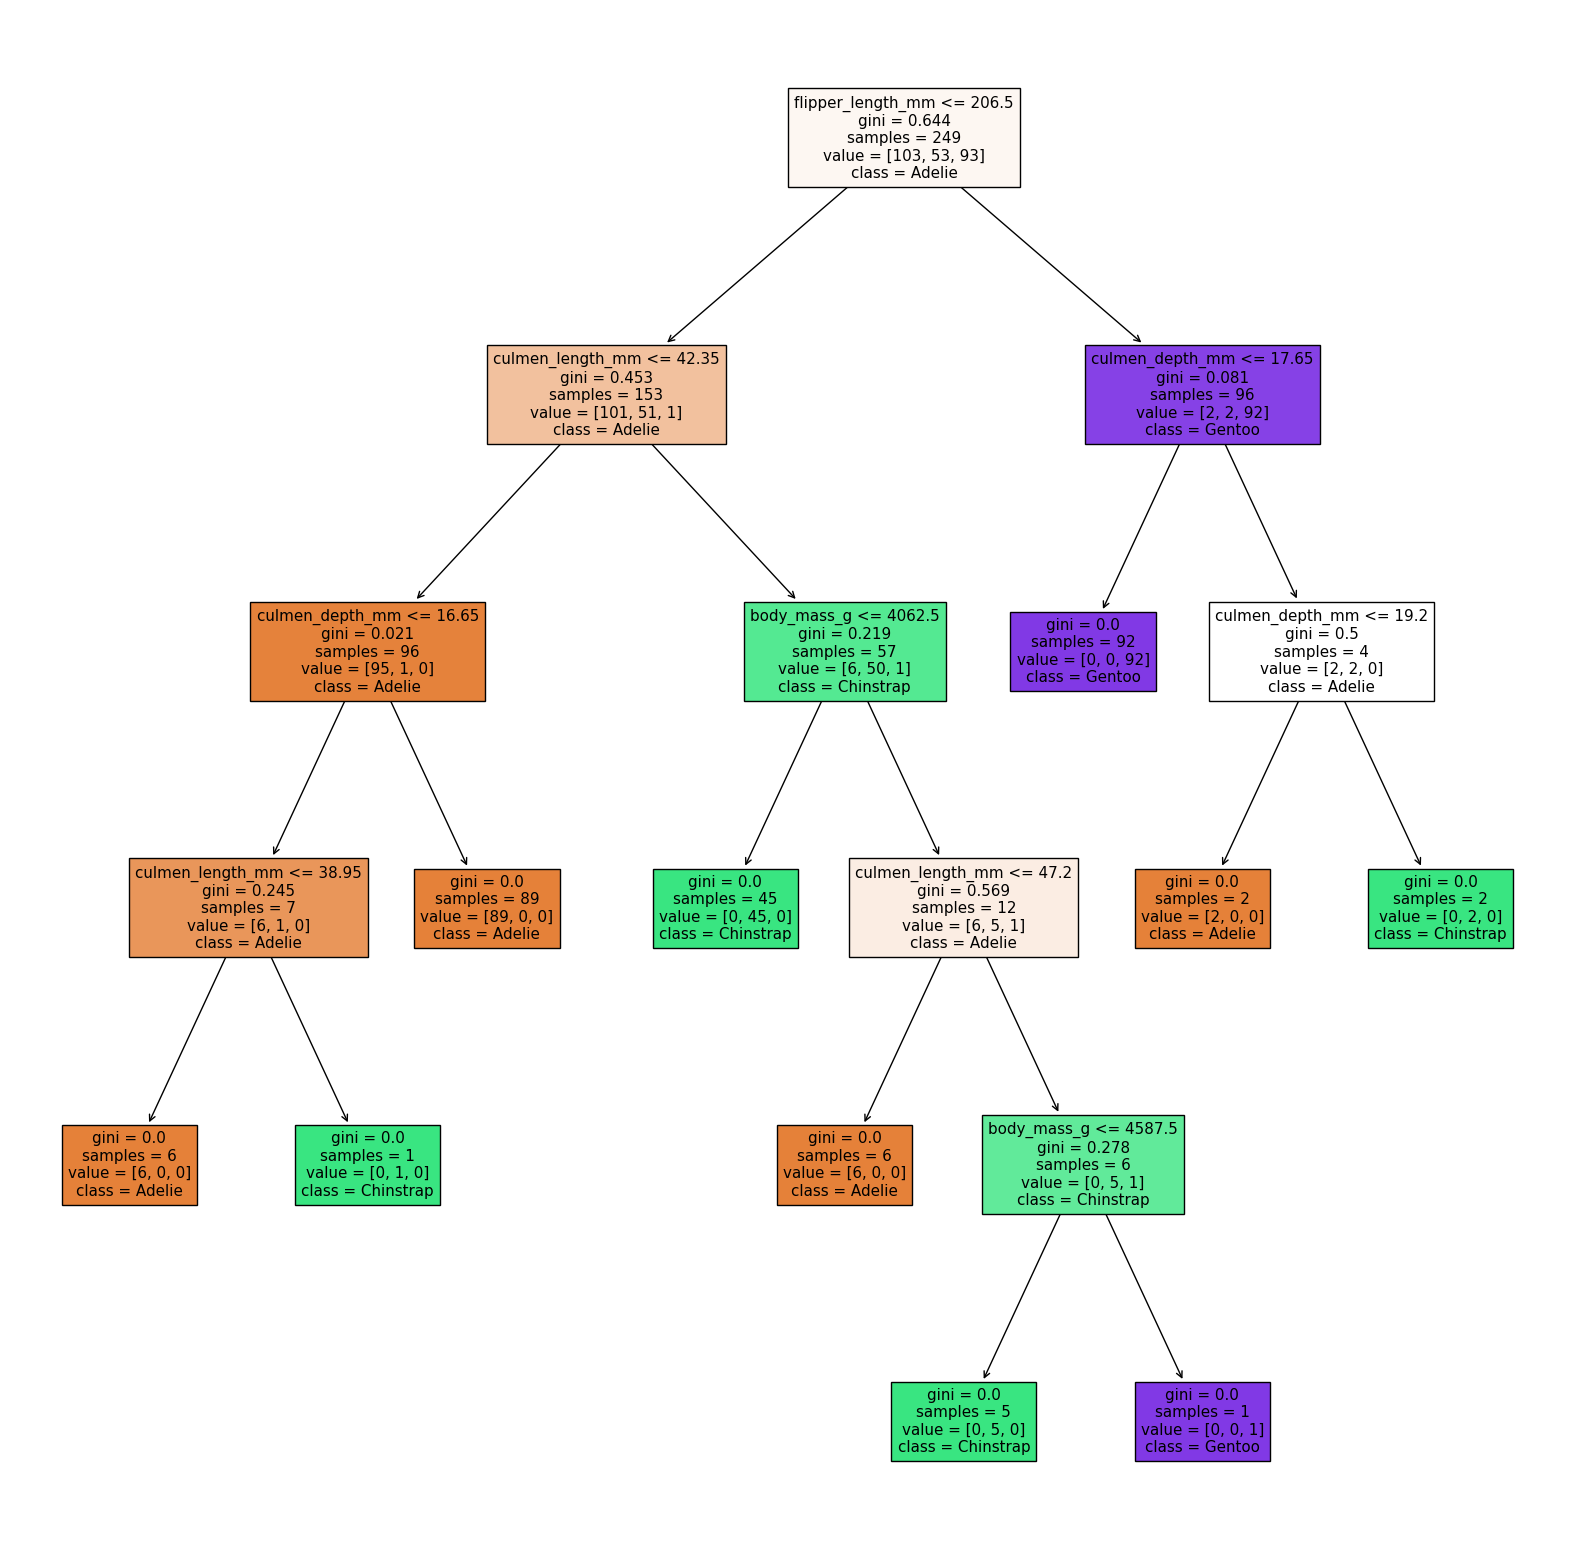

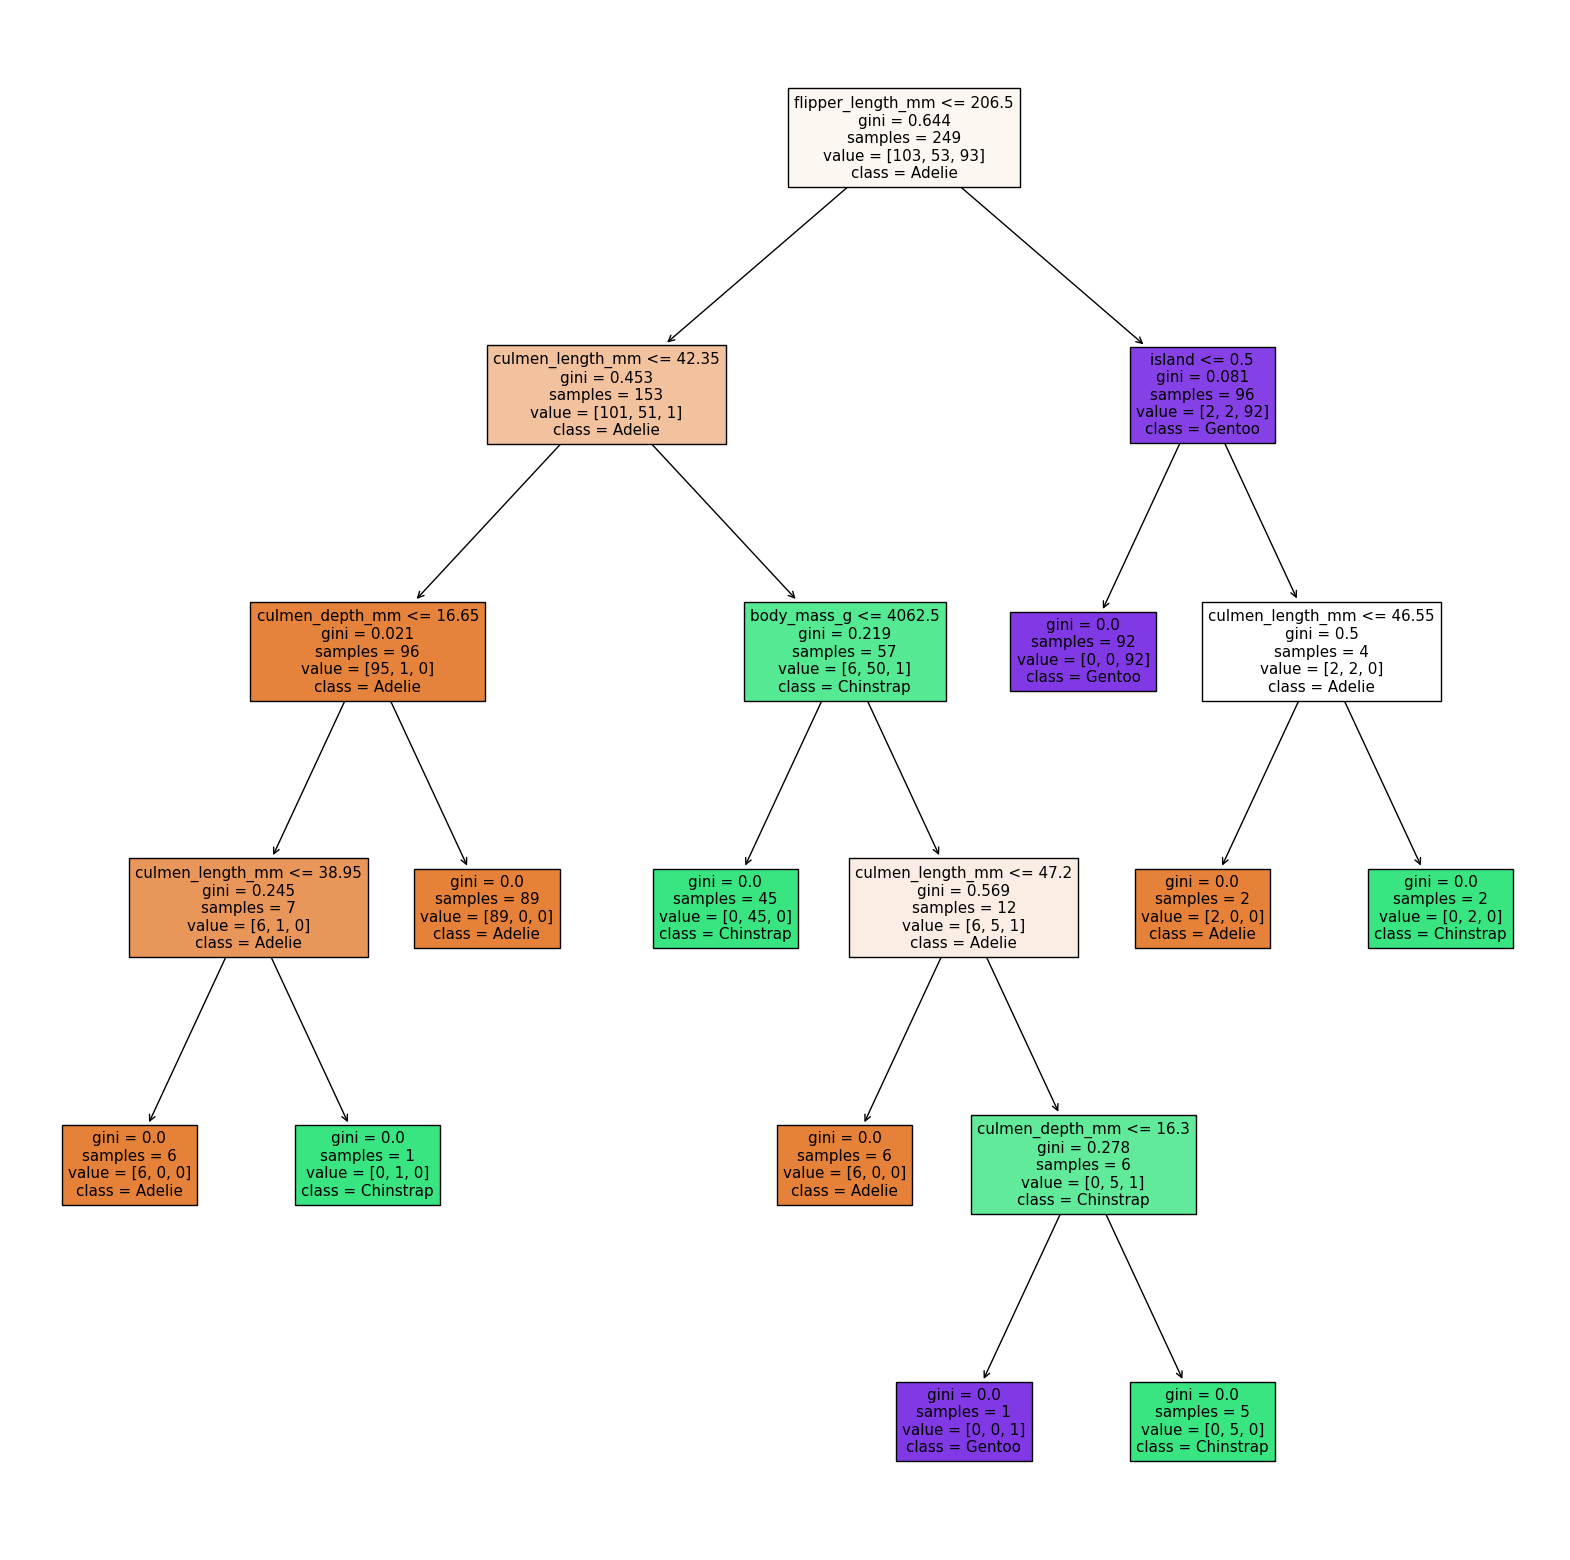

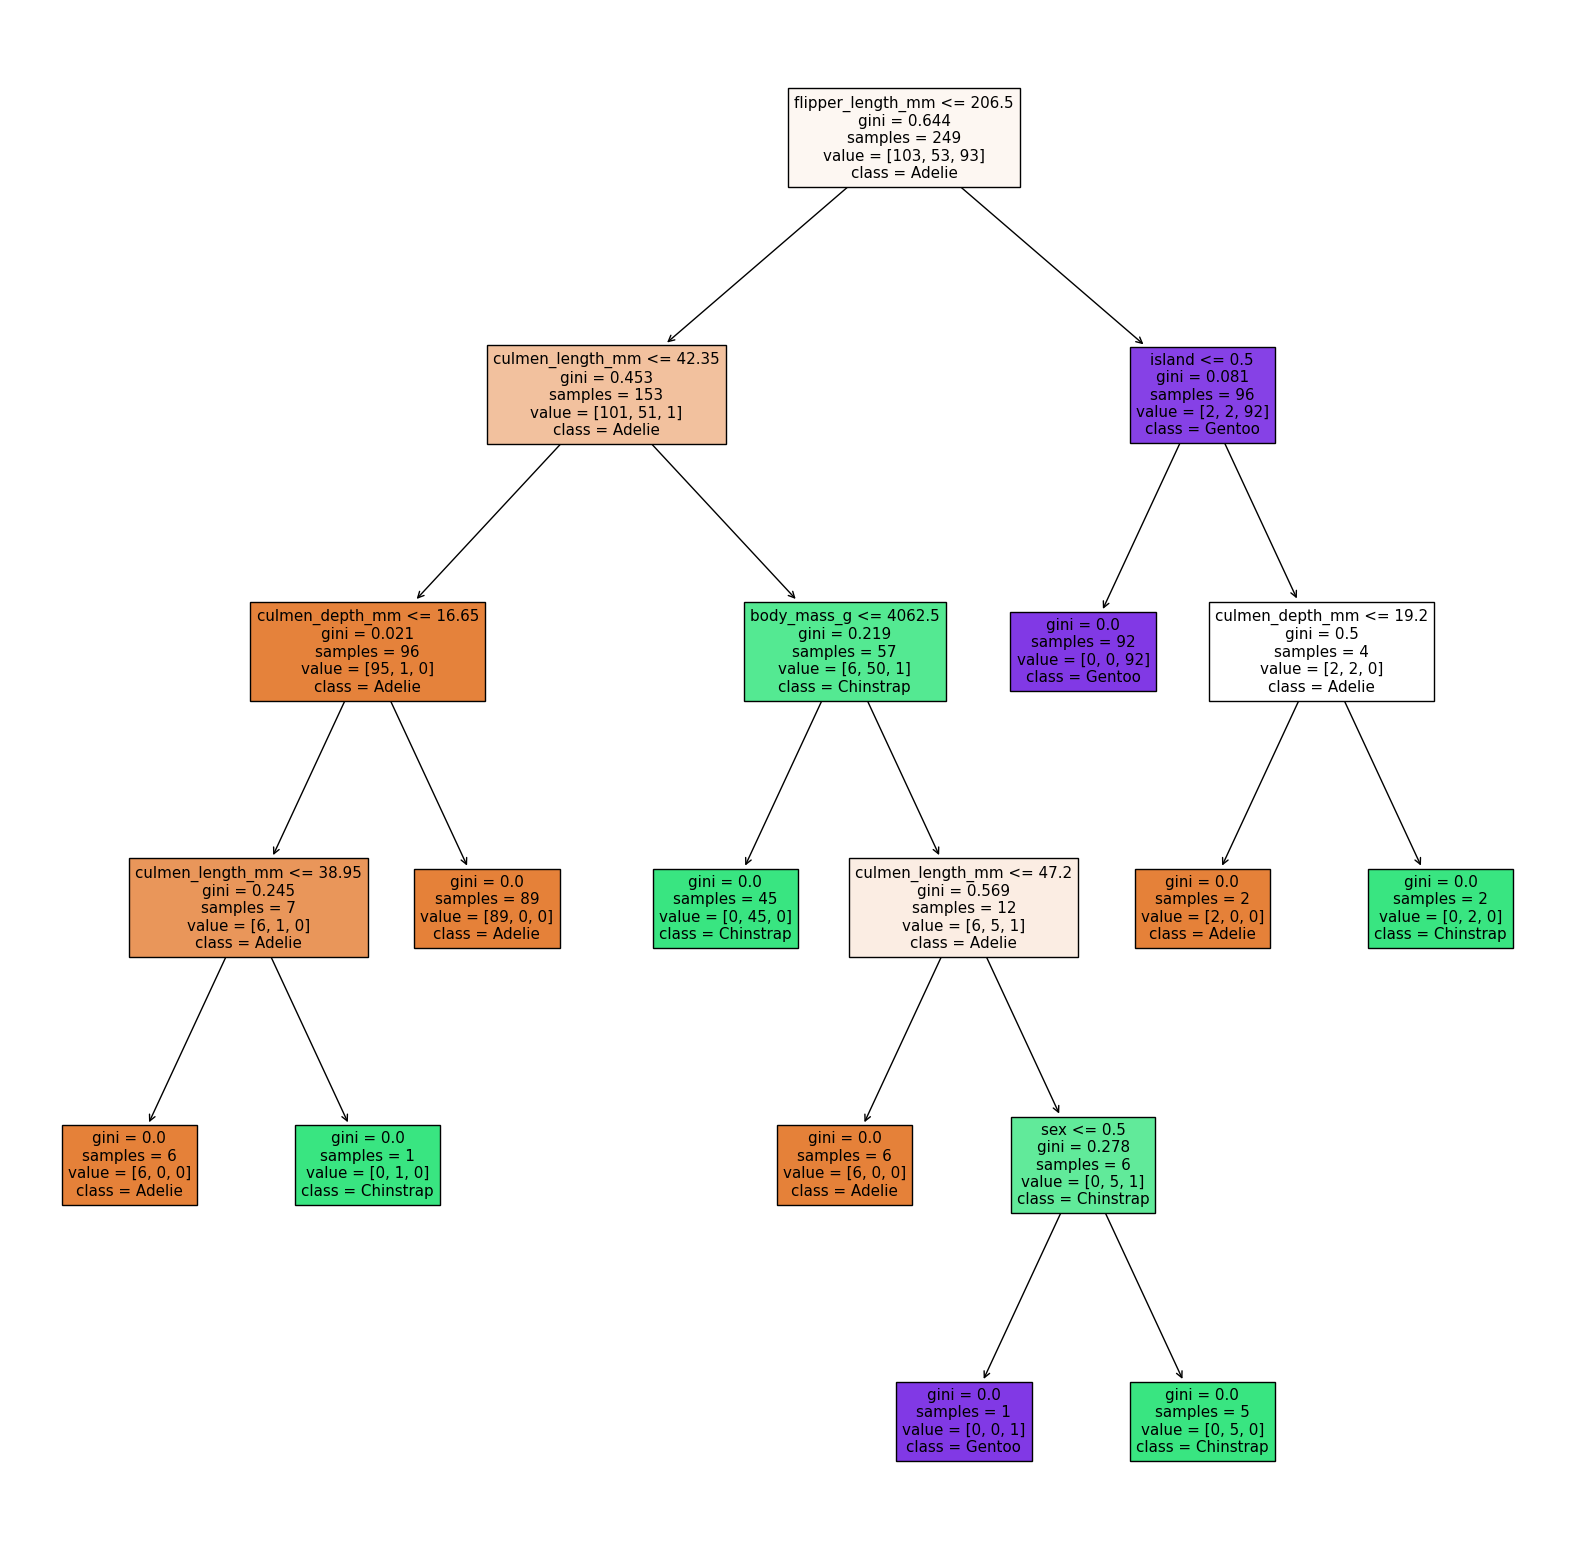

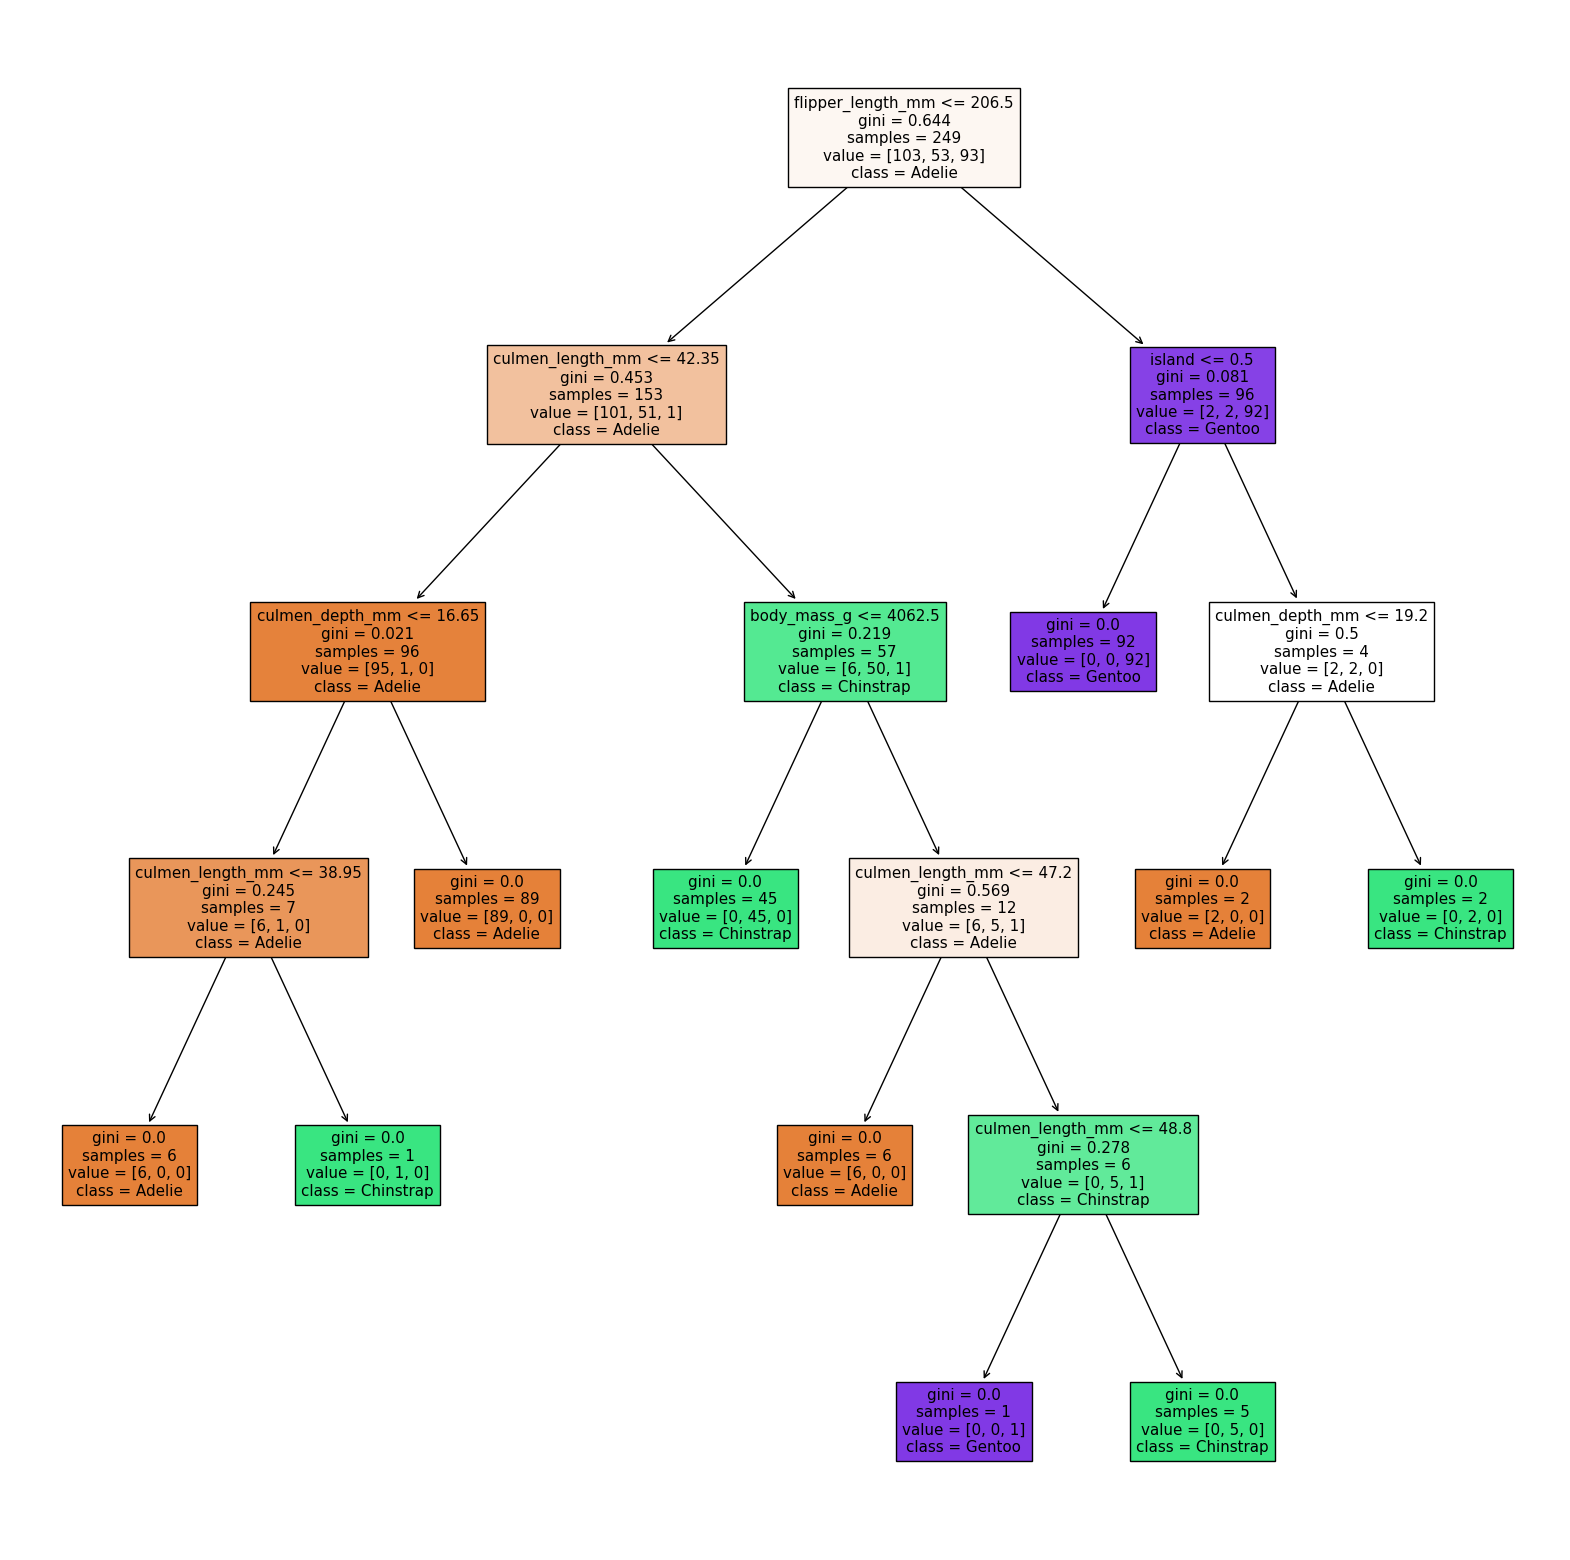

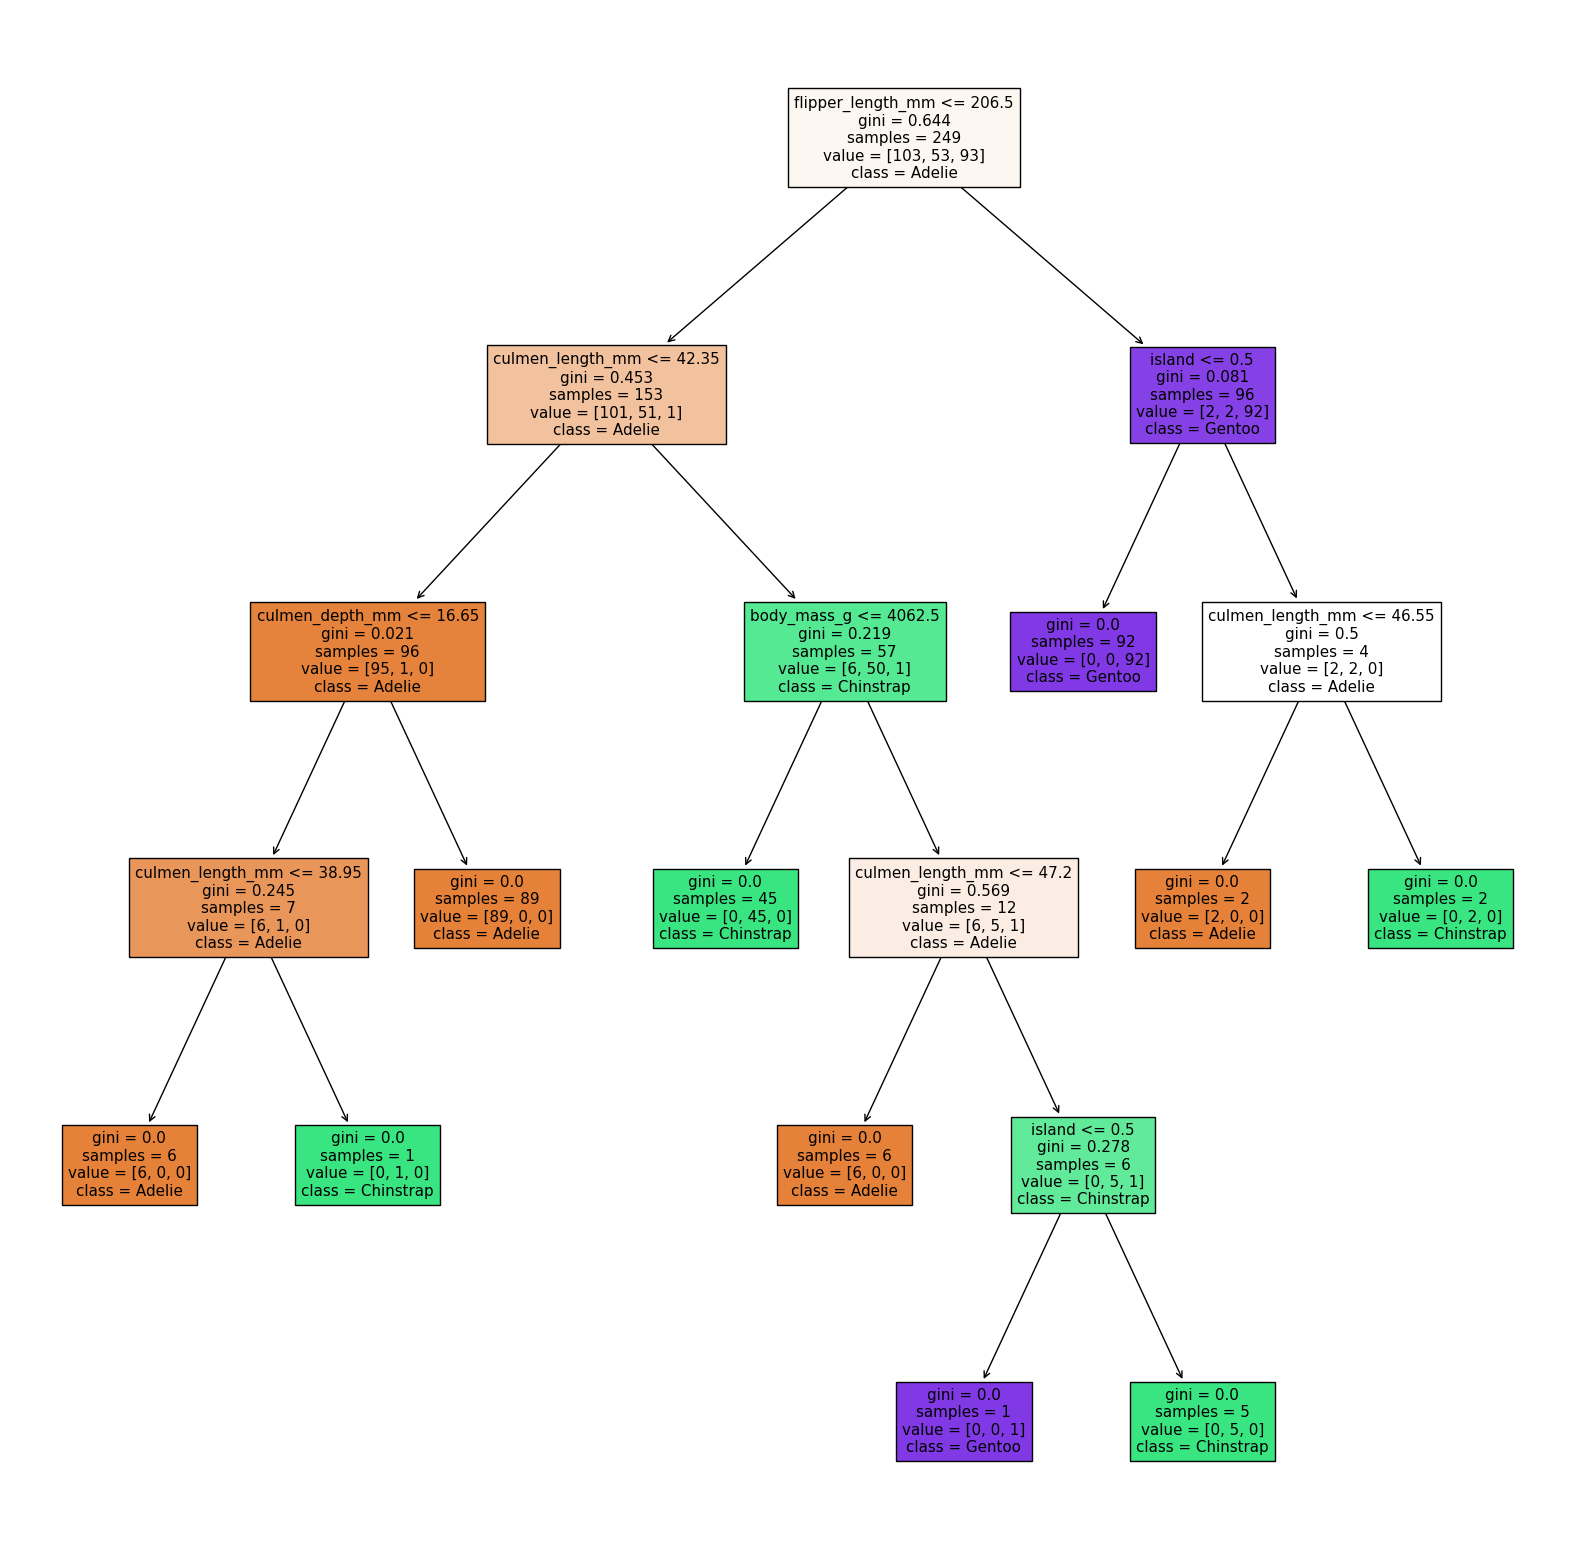

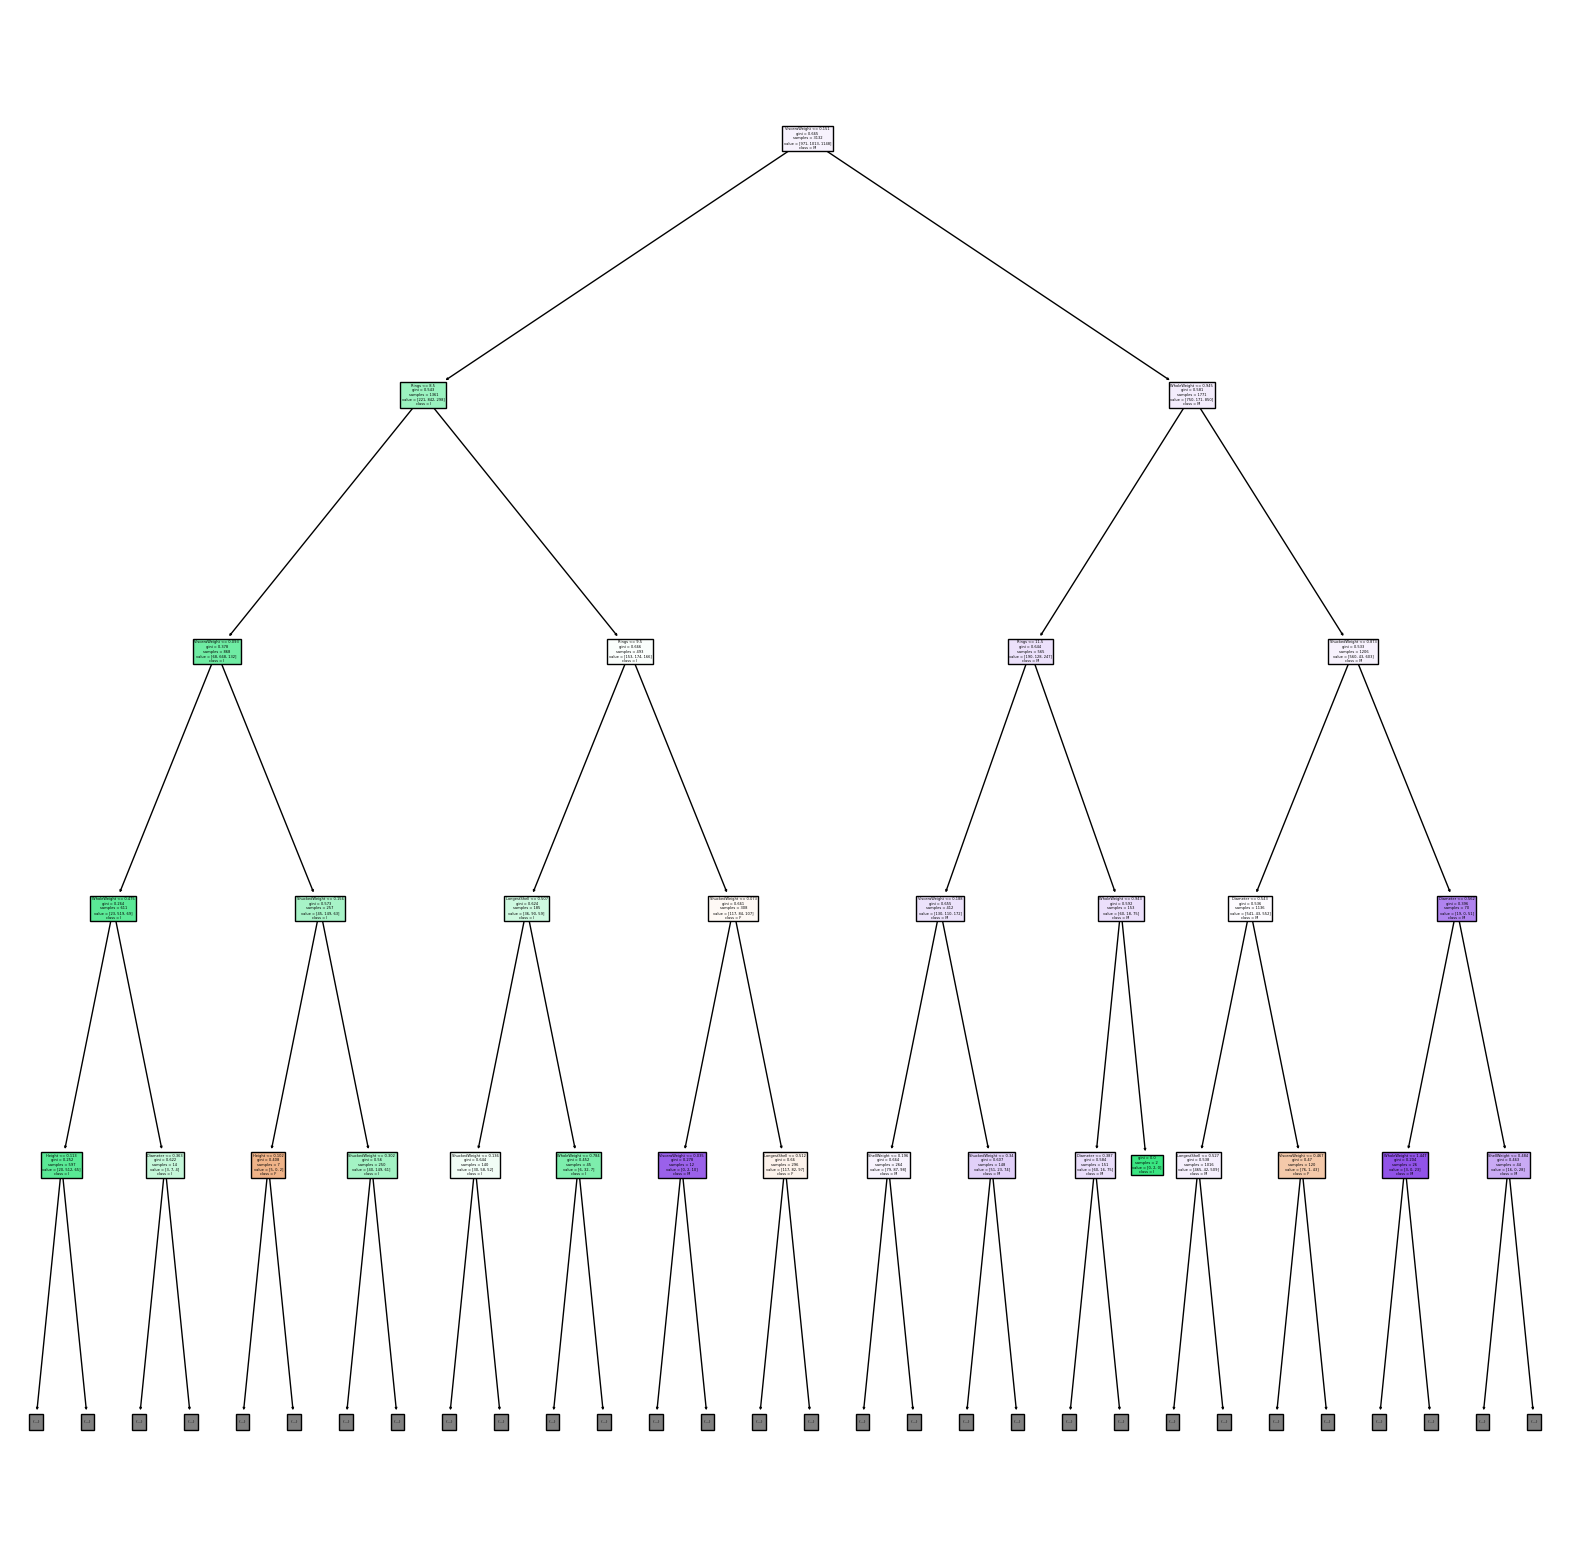

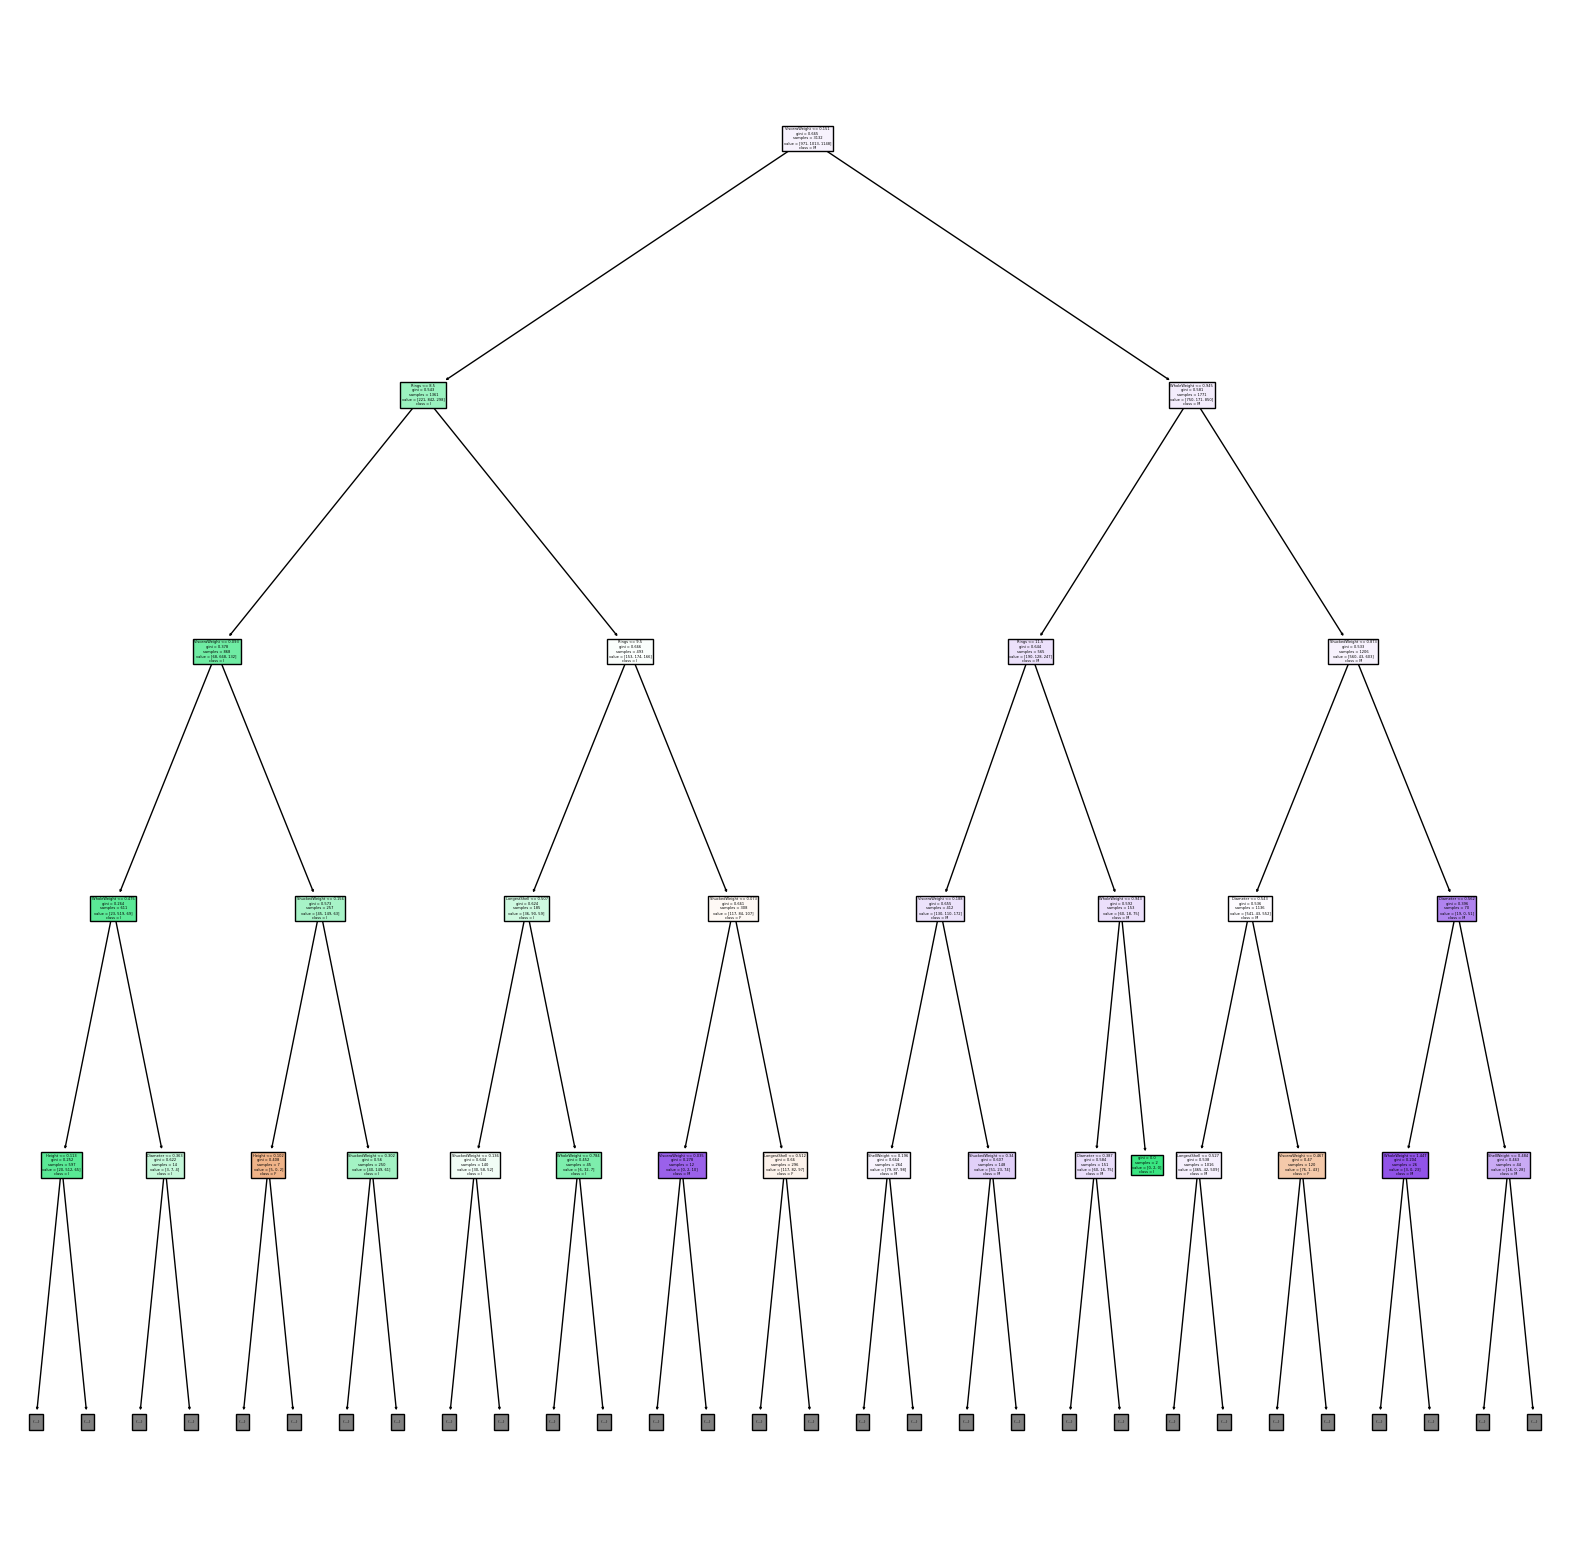

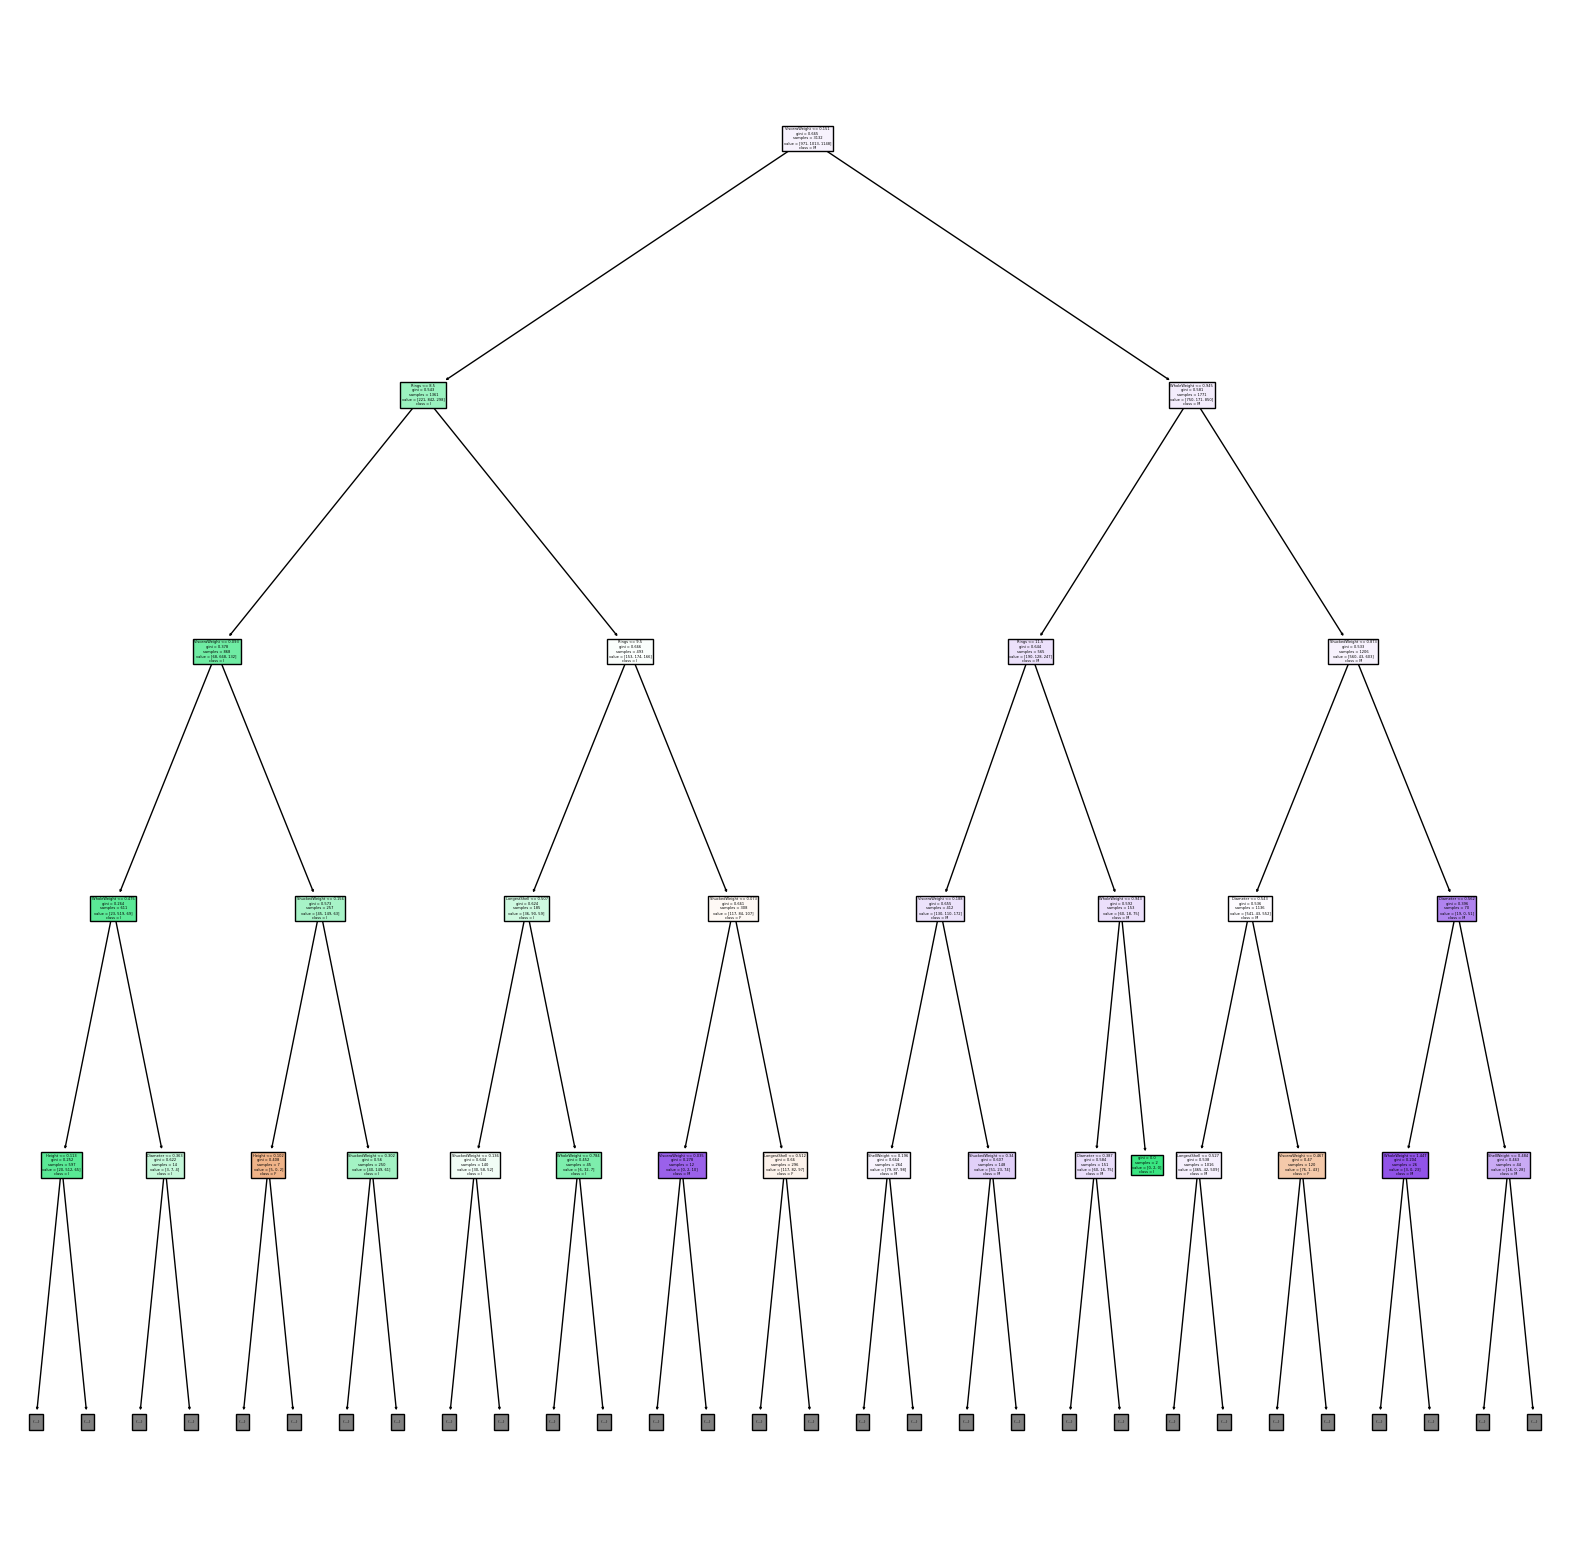

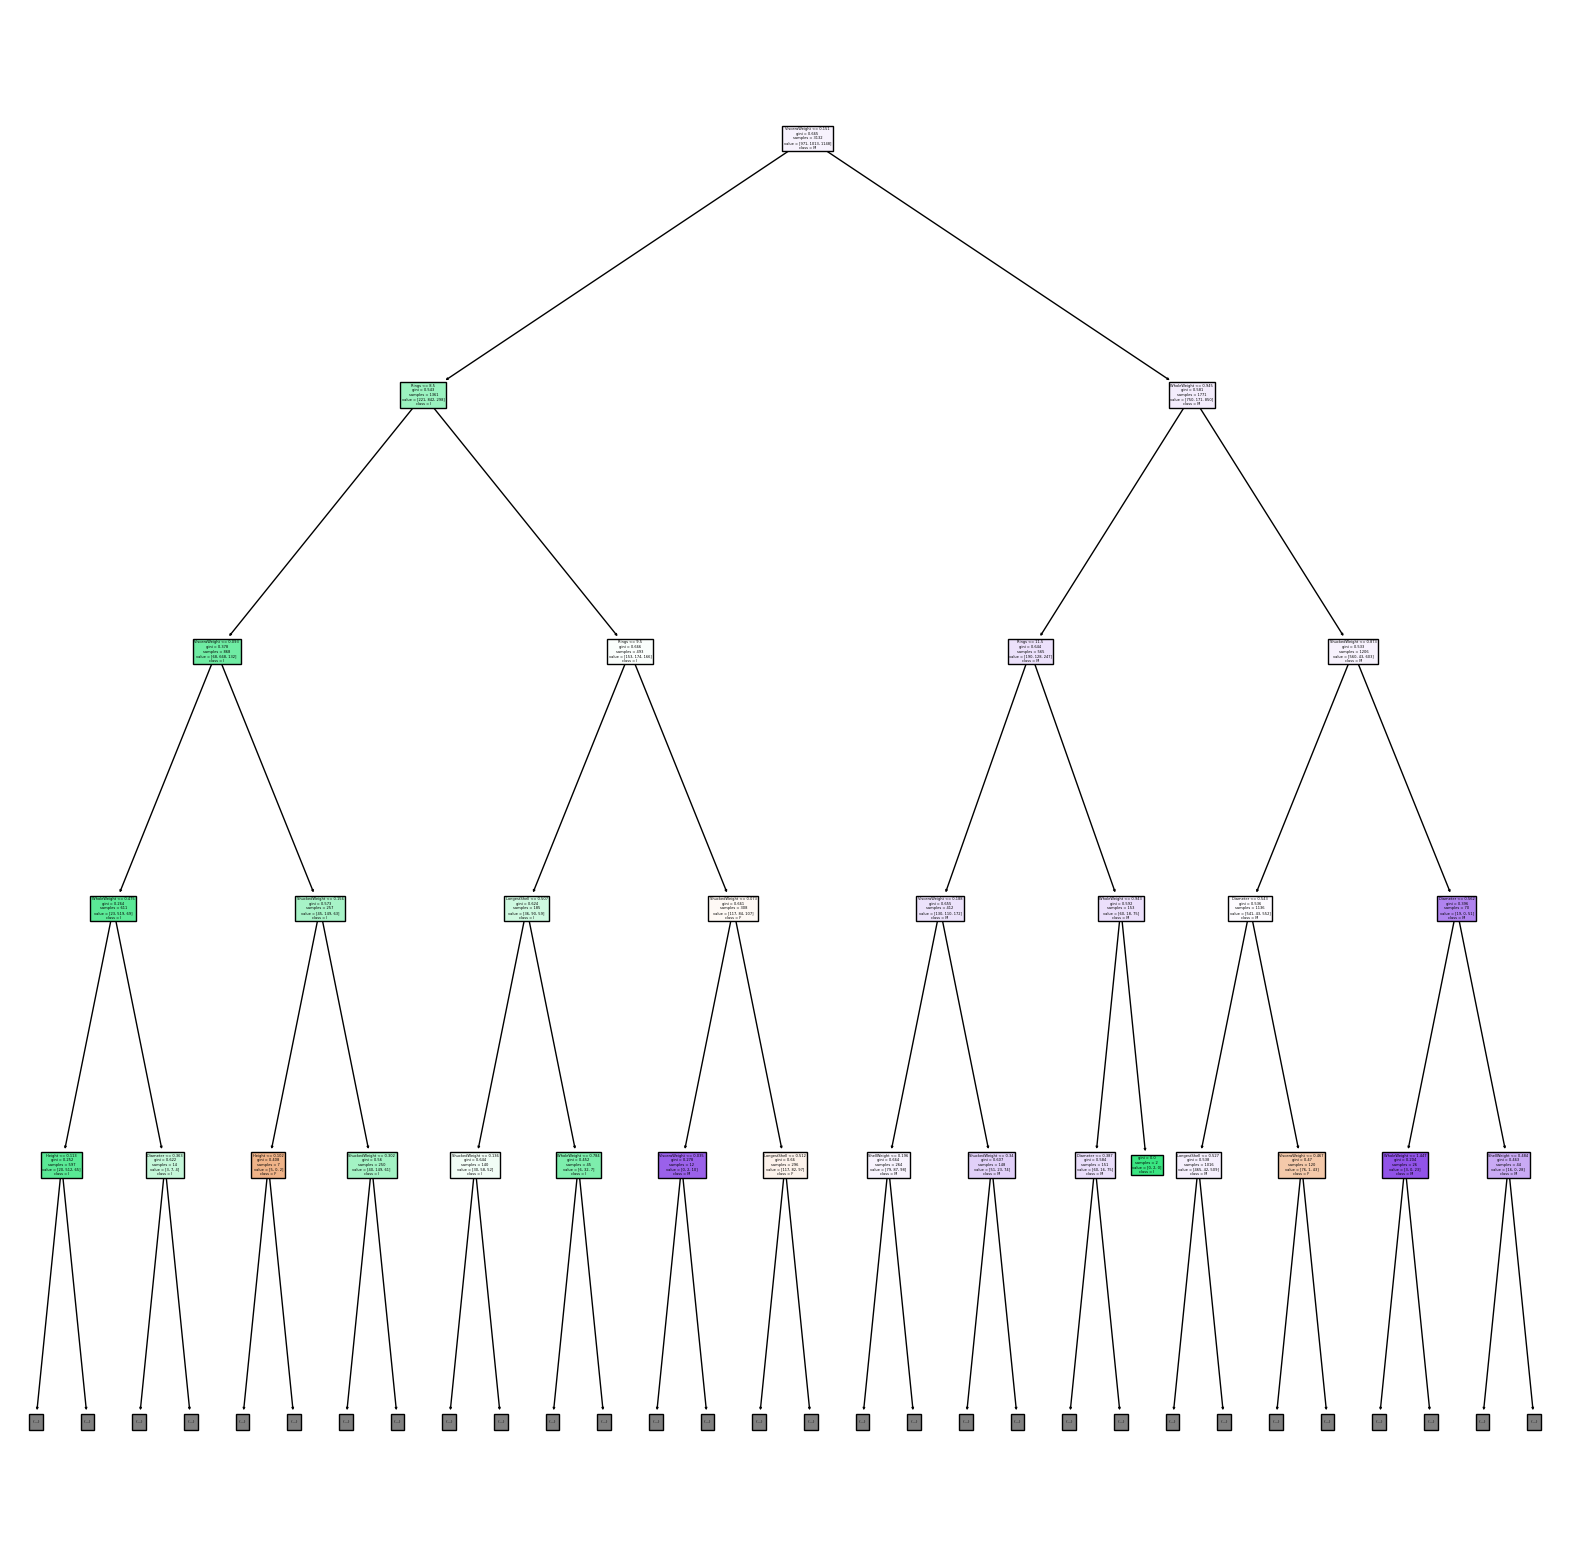

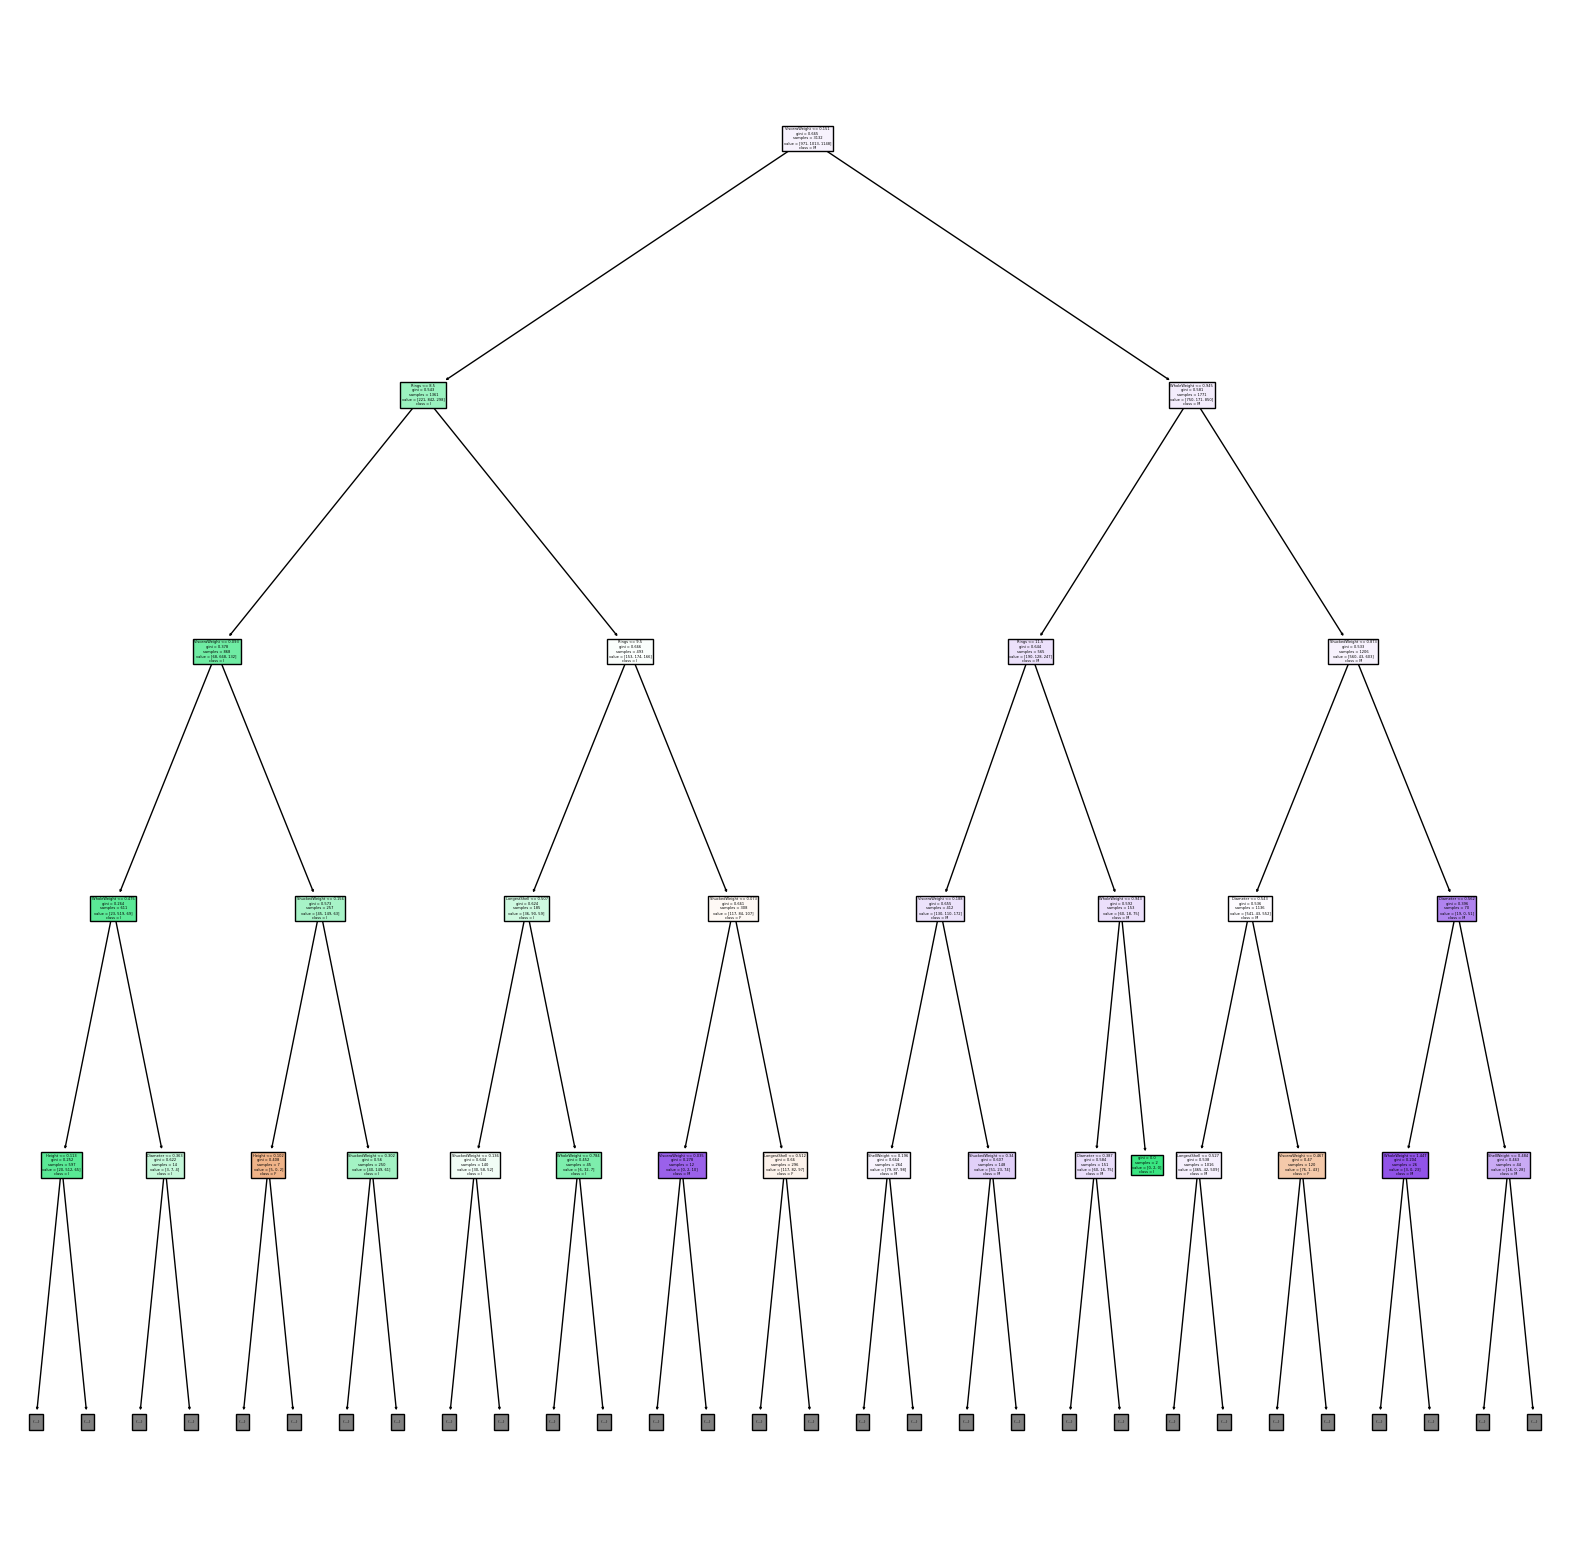

In [109]:
accuracies = []
macro_f1_scores = []
weighted_f1_scores = []
accuracy=0
macro_f1=0
weighted_f1=0
for _ in range(5):
    model_base_dt1 = baseDT(X_train_pen, y_train_pen, ['Adelie', 'Chinstrap', 'Gentoo'])

    # Assuming you have X_test and y_test for evaluation
    y_pred = model_base_dt1.predict(X_test_pen)
    
    accuracy += accuracy_score(y_test_pen, y_pred)
    macro_f1 += f1_score(y_test_pen, y_pred, average='macro')
    weighted_f1 += f1_score(y_test_pen, y_pred, average='weighted')
accuracy/=5
macro_f1/=5
weighted_f1/=5
with open("penguin-performance", 'a') as file:
    file.write("(A) Average accuracy:"+f"{accuracy} \n")
    file.write("(B) Average macro:"+f"{macro_f1} \n")
    file.write("(C) Average weighted:"+f"{weighted_f1} \n")
accuracy=0
macro_f1=0
weighted_f1=0
for _ in range(5):
    model_base_dt2 = baseDT(X_train_aba, y_train_aba, ['F', 'I', 'M'], 4)
    # Assuming you have X_test and y_test for evaluation
    y_pred = model_base_dt1.predict(X_test_pen)

    accuracy += accuracy_score(y_test_pen, y_pred)
    macro_f1 += f1_score(y_test_pen, y_pred, average='macro')
    weighted_f1 += f1_score(y_test_pen, y_pred, average='weighted')
accuracy/=5
macro_f1/=5
weighted_f1/=5
with open("abalone-performance", 'a') as file:
    file.write("(A) Average accuracy:"+f"{accuracy} \n")
    file.write("(B) Average macro:"+f"{macro_f1} \n")
    file.write("(C) Average weighted:"+f"{weighted_f1} \n")
accuracy=0
macro_f1=0
weighted_f1=0